
# Comparativo de Redução de Dimensionalidade: **PCA, t-SNE e UMAP**

Este notebook demonstra e compara **PCA**, **t-SNE** e **UMAP** aplicados ao dataset `breast_cancer` do scikit-learn.

**Você vai ver:**
1. Preparação dos dados e padronização;
2. Redução de dimensionalidade com **PCA** (variância ≥ 95%);
3. Visualização 2D com **PCA (2D)**, **t-SNE (2D)** e **UMAP (2D)**;
4. Comparativo simples de tempo de execução;
5. Dicas práticas de quando usar cada técnica.

> **Observação:** UMAP requer o pacote `umap-learn`. Se não estiver disponível, o notebook detectará e pulará essa etapa.


## 1. Imports e setup

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Import opcional do UMAP
try:
    import umap
    UMAP_AVAILABLE = True
except Exception as e:
    UMAP_AVAILABLE = False
    umap_import_error = str(e)

print("UMAP disponível?", UMAP_AVAILABLE)


/home/vinicius/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-11-12 12:20:35.038886: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-12 12:20:35.161107: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762960835.215201   96052 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762960835.235484   96052 cuda_blas.cc:1407] Unable t

UMAP disponível? True



## 2. Carregar dados e padronizar

Padronizamos as features para **média 0 e desvio 1** porque PCA/t-SNE/UMAP são sensíveis à escala.


In [2]:

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print("Shape original:", X.shape)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Shape original: (569, 30)



## 3. PCA com 95% da variância explicada

Usamos `PCA(n_components=0.95)` para escolher automaticamente o **menor número** de componentes que retém ≥ 95% da variância.


In [3]:

t0 = time.time()
pca_95 = PCA(n_components=0.95, random_state=42)
X_pca_95 = pca_95.fit_transform(X_scaled)
pca_time = time.time() - t0

print("Shape após PCA (95%+):", X_pca_95.shape)
print(f"Variância total explicada: {pca_95.explained_variance_ratio_.sum():.2%}")
print(f"Tempo PCA (95%): {pca_time:.3f}s")

variancia_por_comp = pd.Series(pca_95.explained_variance_ratio_, index=[f"PC{i+1}" for i in range(len(pca_95.explained_variance_ratio_))])
display(variancia_por_comp.to_frame("variancia_explicada"))


Shape após PCA (95%+): (569, 10)
Variância total explicada: 95.16%
Tempo PCA (95%): 0.001s


,variancia_explicada
PC1,0.442720
PC2,0.189712
PC3,0.093932
PC4,0.066021
PC5,0.054958
PC6,0.040245
PC7,0.022507
PC8,0.015887
PC9,0.013896
PC10,0.011690



### 3.1. Variância acumulada (Scree Plot)


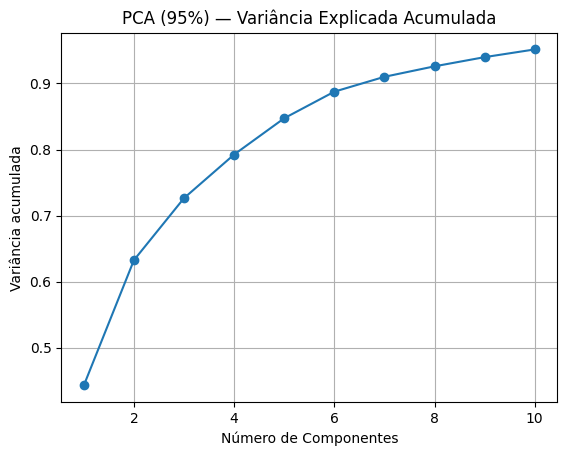

In [4]:

var_acum = np.cumsum(pca_95.explained_variance_ratio_)

plt.figure()
plt.plot(range(1, len(var_acum)+1), var_acum, marker='o')
plt.title('PCA (95%) — Variância Explicada Acumulada')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância acumulada')
plt.grid(True)
plt.show()



## 4. Visualização 2D
Geramos **projeções em 2D** para comparação visual:
- **PCA (2D)**
- **t-SNE (2D)**
- **UMAP (2D)** *(se disponível)*

> Cada gráfico é exibido separadamente (um por figura) e sem definir estilos/cores específicos.


### 4.1 PCA (2D)

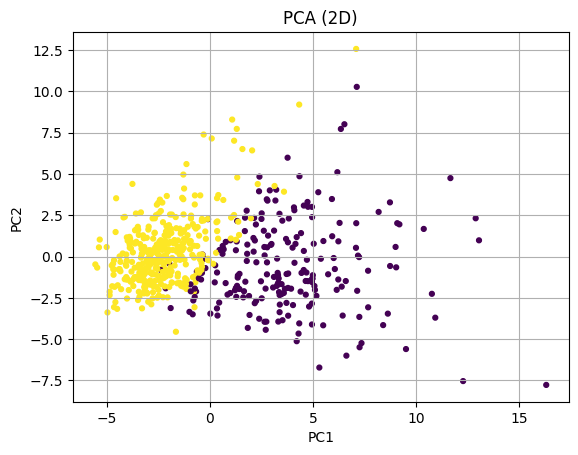

In [5]:

# PCA direto para 2D (visualização)
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=y, s=12)
plt.title('PCA (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


### 4.2 t-SNE (2D)

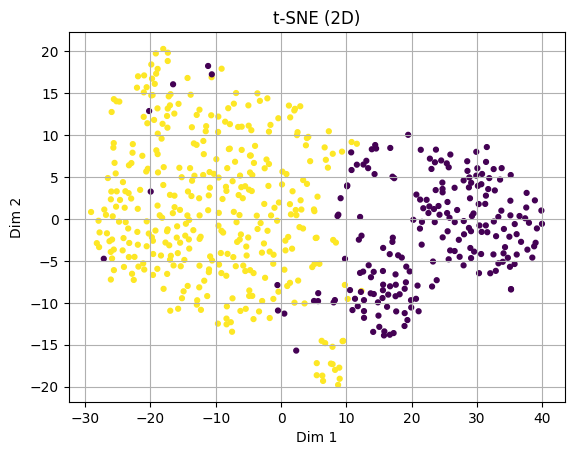

Tempo t-SNE (2D): 6.488s


In [9]:

t0 = time.time()
tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='pca', random_state=42)
X_tsne_2d = tsne.fit_transform(X_scaled)
tsne_time = time.time() - t0

plt.figure()
plt.scatter(X_tsne_2d[:,0], X_tsne_2d[:,1], c=y, s=12)
plt.title('t-SNE (2D)')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.grid(True)
plt.show()

print(f"Tempo t-SNE (2D): {tsne_time:.3f}s")


### 4.3 UMAP (2D)

/home/vinicius/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vinicius/.local/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


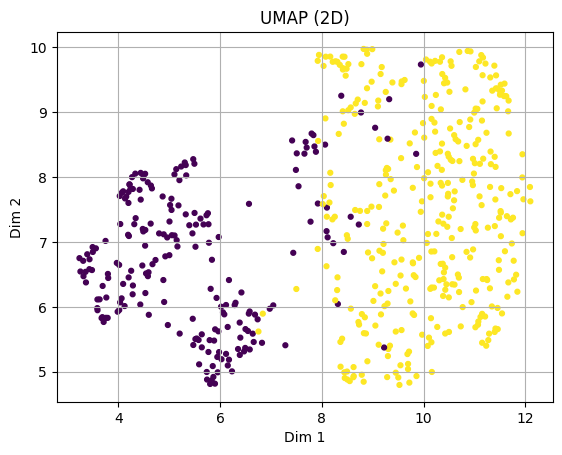

Tempo UMAP (2D): 3.338s


In [7]:

if UMAP_AVAILABLE:
    t0 = time.time()
    reducer = umap.UMAP(n_components=2, random_state=42)
    X_umap_2d = reducer.fit_transform(X_scaled)
    umap_time = time.time() - t0

    plt.figure()
    plt.scatter(X_umap_2d[:,0], X_umap_2d[:,1], c=y, s=12)
    plt.title('UMAP (2D)')
    plt.xlabel('Dim 1')
    plt.ylabel('Dim 2')
    plt.grid(True)
    plt.show()

    print(f"Tempo UMAP (2D): {umap_time:.3f}s")
else:
    print("UMAP não disponível neste ambiente. Para usar, instale: pip install umap-learn")
    if 'umap_import_error' in globals():
        print('Motivo do erro ao importar UMAP:', umap_import_error)


## 5. Comparativo de tempos

In [10]:

tempos = {'PCA_95% (ajuste+transformação)': pca_time,
          't-SNE_2D (ajuste+transformação)': tsne_time}

if 'umap_time' in globals():
    tempos['UMAP_2D (ajuste+transformação)'] = umap_time

df_tempos = pd.Series(tempos).to_frame('segundos')
display(df_tempos)


,segundos
PCA_95% (ajuste+transformação),0.001375
t-SNE_2D (ajuste+transformação),6.487595
UMAP_2D (ajuste+transformação),3.337561



## 6. Quando usar cada técnica

- **PCA** (linear): excelente para **compressão**, remoção de colinearidade e **pré-processamento**; rápido e interpretável.  
- **t-SNE** (não linear): ótimo para **visualização exploratória** e revelar **estruturas locais**; pode ser lento em datasets grandes.  
- **UMAP** (não linear): visualização e **redução rápida** preservando estrutura local e parte da global; em geral mais **escalável** que t-SNE.

**Dicas práticas:**
- Use **PCA** para reduzir de *muitas* features para algumas dezenas mantendo variância (ex.: 0.95).  
- Para **visualizar** clusters/embeddings em 2D/3D, prefira **UMAP** ou **t-SNE**.  
- Em pipelines de ML, experimente **PCA → (UMAP/t-SNE 2D)** só para visualização, mantendo **PCA** para o modelo final.
